<IPython.core.display.Javascript object>


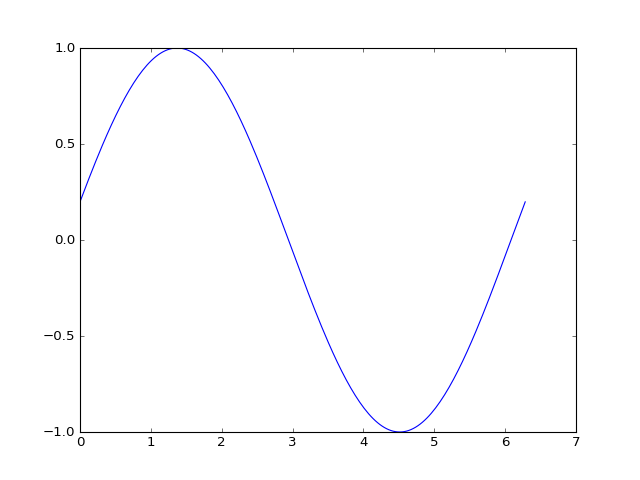

In [4]:
"""
laufender sinus
"""
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# initialisiere plot-Flaeche
fig, ax = plt.subplots()

# x-Daten, in diesem Plot fest
x = np.linspace(0, 2*np.pi, 200)

# initialiesiere die Linie
line, = ax.plot(x, np.sin(x))

def animate(i):
    # neue y-Werte zum "Zeitpunkt" i/10. 
    line.set_ydata(np.sin(x + i/10.0))  
    return line,


# das init braucht man nur fuer blitting
def init():
    line.set_ydata([])
    return line,

# da blitting sorgt dafuer, dass nur Teile der Kurve, die sich aendern, geplottet werden
# interval => neues bild alle 25 Millisekunden
ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()


<IPython.core.display.Javascript object>


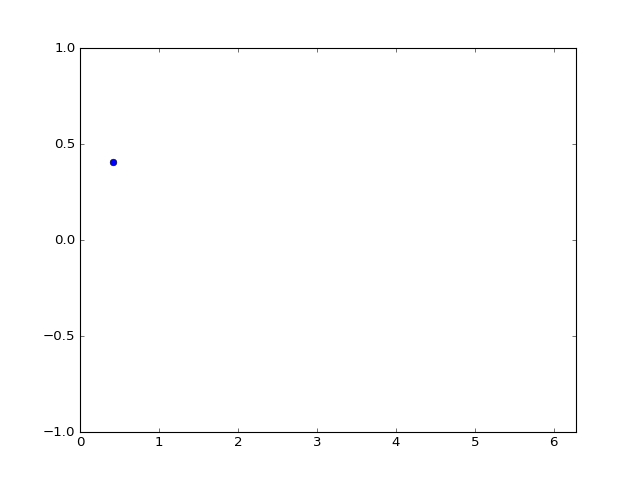

In [5]:
"""
laufender punkt auf sinus
"""
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


fig, ax = plt.subplots()

ax.set_xlim([0, 2.*np.pi])
ax.set_ylim([-1, 1])

line, = ax.plot([], [], 'o')


def animate(i):
    x = math.fmod(i*.1, 2.*np.pi)
    print(x)
    line.set_xdata(x)
    line.set_ydata(np.sin(x))  # update the data
    return line,


# das init braucht man nur fuer blitting
def init():
    line.set_xdata([])
    line.set_ydata([])
    return line,

# da blitting sorgt dafuer, dass nur Teile der Kurve, die sich aendern, geplottet werden
ani = animation.FuncAnimation(fig, animate, np.arange(0, 200), init_func=init,
                              interval=25, blit=True)

'''
x0 = np.linspace(0, 2.*np.pi, 100)
ax.plot(x0, np.sin(x0))
'''

plt.show()


Fortgeschritten:
```python
ani.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()
```

siehe auch: https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
sowie: http://matplotlib.org/examples/animation/index.html

<IPython.core.display.Javascript object>


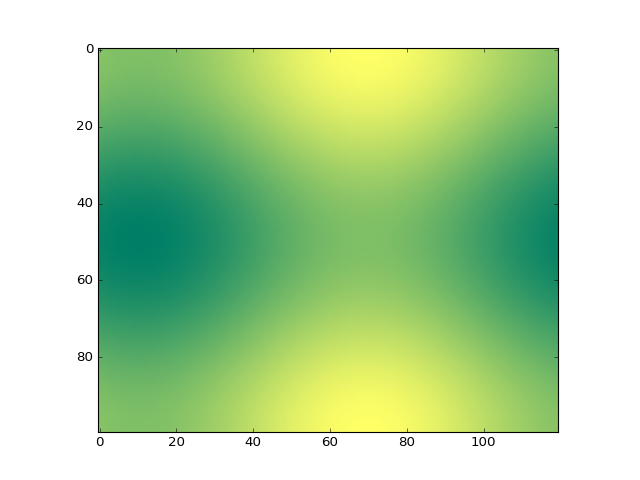

In [6]:

"""
laufendes imshow
"""
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), cmap=plt.get_cmap('summer'), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()